# To connect to google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### below step is not nesccery if you don't want to download a file from its id

In [ ]:
!pip install -U -q Pydrive2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#### functions to list and download all files in the specified folder and its subfolders:

In [ ]:
import os

def list_files_in_folder(folder_id):
    """List all files in the given folder ID."""
    query = f"'{folder_id}' in parents and trashed=false"
    file_list = drive.ListFile({'q': query}).GetList()
    return file_list

def download_folder(folder_id, local_path):
    """Download all files and folders from Google Drive folder to local path."""
    os.makedirs(local_path, exist_ok=True)
    file_list = list_files_in_folder(folder_id)

    for file in file_list:
        file_name = file['title']
        file_id = file['id']
        if file['mimeType'] == 'application/vnd.google-apps.folder':
            # If the file is a folder, recursively download it
            download_folder(file_id, os.path.join(local_path, file_name))
        else:
            # If the file is not a folder, download it
            print(f'Downloading {file_name}...')
            downloaded = drive.CreateFile({'id': file_id})
            downloaded.GetContentFile(os.path.join(local_path, file_name))
            print(f'{file_name} downloaded.')

# Specify the folder ID and local path where you want to save the files
folder_id = '11AurTIg6XkmTi39lF9GHwEh3C_oFs6lB'  # Replace with your folder ID
local_path = '/content/drive/MyDrive/yolov9_results_with_weight'  # Replace with your desired local path

# Download the folder
download_folder(folder_id, local_path)


events.out.tfevents.1720365593.b976c50089b7.3289.0 downloaded.
results.csv downloaded.
labels.jpg downloaded.
labels_correlogram.jpg downloaded.
opt.yaml downloaded.
hyp.yaml downloaded.
events.out.tfevents.1720361774.3ca04e4f4d45.9538.0 downloaded.
best.pt downloaded.
last.pt downloaded.
events.out.tfevents.1719684525.0d26748b0579.3712.0 downloaded.
train_batch1.jpg downloaded.
train_batch2.jpg downloaded.
train_batch0.jpg downloaded.


## Seting up yolo and the Datasets


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 8.24 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.8 MB/s eta 0:00:00


### Download the Dataset Files:

In [ ]:
# Create a directory for the dataset
dataset_dir = '/content/datasets/VisDrone'
os.makedirs(dataset_dir, exist_ok=True)

# Download the dataset files
!wget -q --show-progress -O {dataset_dir}/VisDrone2019-DET-train.zip 'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-train.zip'
!wget -q --show-progress -O {dataset_dir}/VisDrone2019-DET-val.zip 'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-val.zip'
!wget -q --show-progress -O {dataset_dir}/VisDrone2019-DET-test-dev.zip 'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-test-dev.zip'
!wget -q --show-progress -O {dataset_dir}/VisDrone2019-DET-test-challenge.zip 'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-test-challenge.zip'
!wget -q --show-progress -O {dataset_dir}/VisDrone2019-VID-test-dev.zip 'https://drive.usercontent.google.com/download?id=1-BEq--FcjshTF1UwUabby_LHhYj41os5&export=download&authuser=2&confirm=t&uuid=7fc409c3-d13d-4090-b9e9-fc3ac9f1c32f&at=APZUnTW5wbsPMh4woDuW_HNY4uFj%3A1720181545143'


/content/datasets/V 100%[===================>]   1.44G  18.5MB/s    in 9.3s    
/content/datasets/V 100%[===================>]  77.86M   304MB/s    in 0.3s    
/content/datasets/V 100%[===================>] 296.83M   206MB/s    in 1.4s    
/content/datasets/V 100%[===================>] 292.01M   197MB/s    in 1.5s    
atasets/VisDrone/Vi   8%[>                   ] 176.01M  11.6MB/s    eta 3m 4s  

### Unzip the Files:

In [ ]:
# Unzip the files
!unzip -q {dataset_dir}/VisDrone2019-DET-train.zip -d {dataset_dir}
!unzip -q {dataset_dir}/VisDrone2019-DET-val.zip -d {dataset_dir}
!unzip -q {dataset_dir}/VisDrone2019-DET-test-dev.zip -d {dataset_dir}
!unzip -q {dataset_dir}/VisDrone2019-DET-test-challenge.zip -d {dataset_dir}
!unzip -q {dataset_dir}/VisDrone2019-VID-test-dev.zip -d {dataset_dir}

### Verify YAML File:

In [ ]:
import os
from pathlib import Path
import yaml

# Define the YAML content
yaml_content = """
# Ultralytics YOLO 🚀, AGPL-3.0 license
# VisDrone2019-DET dataset https://github.com/VisDrone/VisDrone-Dataset by Tianjin University
# Documentation: https://docs.ultralytics.com/datasets/detect/visdrone/
# Example usage: yolo train data=VisDrone.yaml

path: /content/datasets/VisDrone  # dataset root dir
train: VisDrone2019-DET-train/images  # train images (relative to 'path')
val: VisDrone2019-DET-val/images  # val images (relative to 'path')
test: VisDrone2019-DET-test-dev/images  # test images (optional)

# Classes
names:
  0: pedestrian
  1: people
  2: bicycle
  3: car
  4: van
  5: truck
  6: tricycle
  7: awning-tricycle
  8: bus
  9: motor
"""

# Save the YAML content to a file
yaml_file_path = '/content/yolov9/data/VisDrone.yaml'
os.makedirs(os.path.dirname(yaml_file_path), exist_ok=True)
with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)


### The script to convert the annotations to YOLO format:

In [ ]:
from PIL import Image
from tqdm import tqdm

def visdrone2yolo(dir):
    def convert_box(size, box):
        dw = 1. / size[0]
        dh = 1. / size[1]
        return (box[0] + box[2] / 2) * dw, (box[1] + box[3] / 2) * dh, box[2] * dw, box[3] * dh

    img_folder_name = 'images'
    if not (dir / img_folder_name).exists():
        img_folder_name = 'sequences'
    img_folder_path = dir / img_folder_name

    (dir / 'labels').mkdir(parents=True, exist_ok=True)

    pbar = tqdm((dir / 'annotations').glob('*.txt'), desc=f'Converting {dir}')
    for f in pbar:
        img_path = (img_folder_path / f.stem).with_suffix('.jpg')
        if not img_path.is_file():
            continue
        img_size = Image.open(img_path).size
        lines = []
        with open(f, 'r') as file:
            for row in [x.split(',') for x in file.read().strip().splitlines()]:
                if row[4] == '0':
                    continue
                cls = int(row[5]) - 1
                box = convert_box(img_size, tuple(map(int, row[:4])))
                lines.append(f"{cls} {' '.join(f'{x:.6f}' for x in box)}\n")
            with open(str(f).replace(f'{os.sep}annotations{os.sep}', f'{os.sep}labels{os.sep}'), 'w') as fl:
                fl.writelines(lines)

for d in ['VisDrone2019-DET-train', 'VisDrone2019-DET-val', 'VisDrone2019-DET-test-dev', 'VisDrone2019-VID-test-dev']:
    visdrone2yolo(Path(dataset_dir) / d)


Converting /content/datasets/VisDrone/VisDrone2019-DET-train: 6471it [00:05, 1292.72it/s]
Converting /content/datasets/VisDrone/VisDrone2019-DET-val: 548it [00:00, 1465.29it/s]
Converting /content/datasets/VisDrone/VisDrone2019-DET-test-dev: 1610it [00:00, 1830.28it/s]
Converting /content/datasets/VisDrone/VisDrone2019-VID-test-dev: 17it [00:00, 30694.43it/s]


# **Without weight:**

## Train the YOLOv9 Model:

In [ ]:
!python train.py --batch 8 --epochs 25 --img 640 --device 0 --data /content/yolov9/data/VisDrone.yaml --weights '' --cfg models/detect/gelan-c.yaml --hyp data/hyps/hyp.scratch-high.yaml --project /content/drive/MyDrive/yolov9_results --name visdrone_experiment


2024-06-16 14:47:39.084161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 14:47:39.084223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 14:47:39.193451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-16 14:47:39.414895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 14:47:41.602649: W tensorflow/comp

## resume the train the YOLOv9 Model:

In [ ]:
!python train.py --resume /content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/last.pt


2024-06-17 02:01:01.705335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 02:01:01.705398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 02:01:01.835277: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 02:01:02.077118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 02:01:04.053855: W tensorflow/compiler/tf2


## Examine Training Results

In [ ]:
# List the contents of the results directory
!ls /content/drive/MyDrive/yolov9_results/visdrone_experiment4


confusion_matrix.png				     labels.jpg        train_batch2.jpg
events.out.tfevents.1718535419.560c827316a7.18973.0  opt.yaml	       val_batch0_labels.jpg
events.out.tfevents.1718550193.6082b8f9ceaf.13182.0  P_curve.png       val_batch0_pred.jpg
events.out.tfevents.1718561536.a792b9d91cb3.2194.0   PR_curve.png      val_batch1_labels.jpg
events.out.tfevents.1718570541.cee5573f5438.1969.0   R_curve.png       val_batch1_pred.jpg
events.out.tfevents.1718589665.e6b822c4b389.4742.0   results.csv       val_batch2_labels.jpg
F1_curve.png					     results.png       val_batch2_pred.jpg
hyp.yaml					     train_batch0.jpg  weights
labels_correlogram.jpg				     train_batch1.jpg


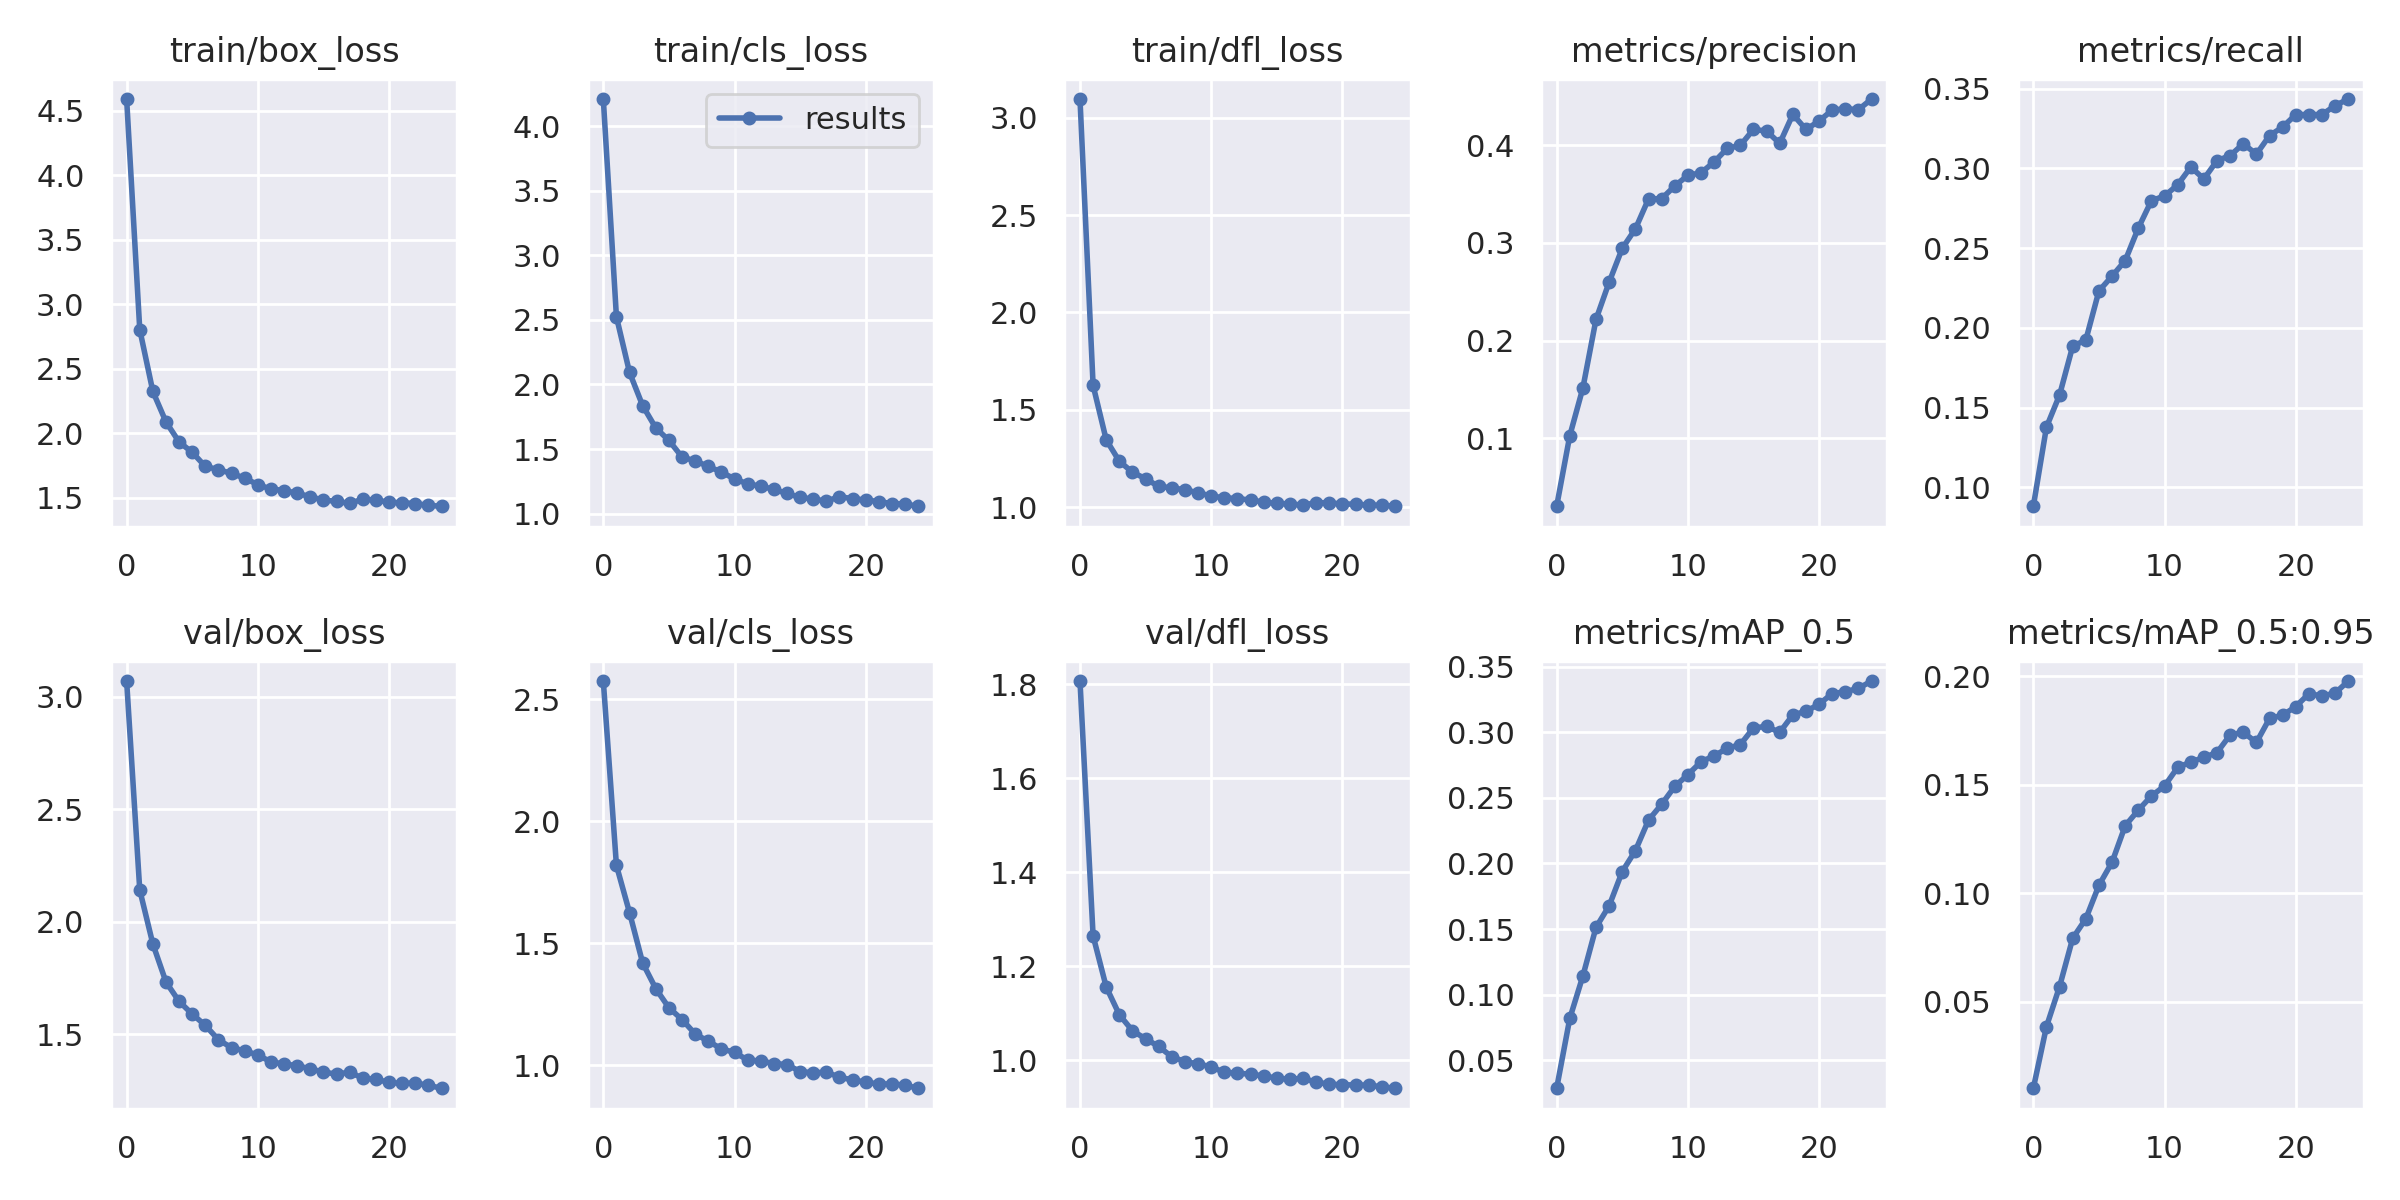

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results/visdrone_experiment4/results.png", width=1000)

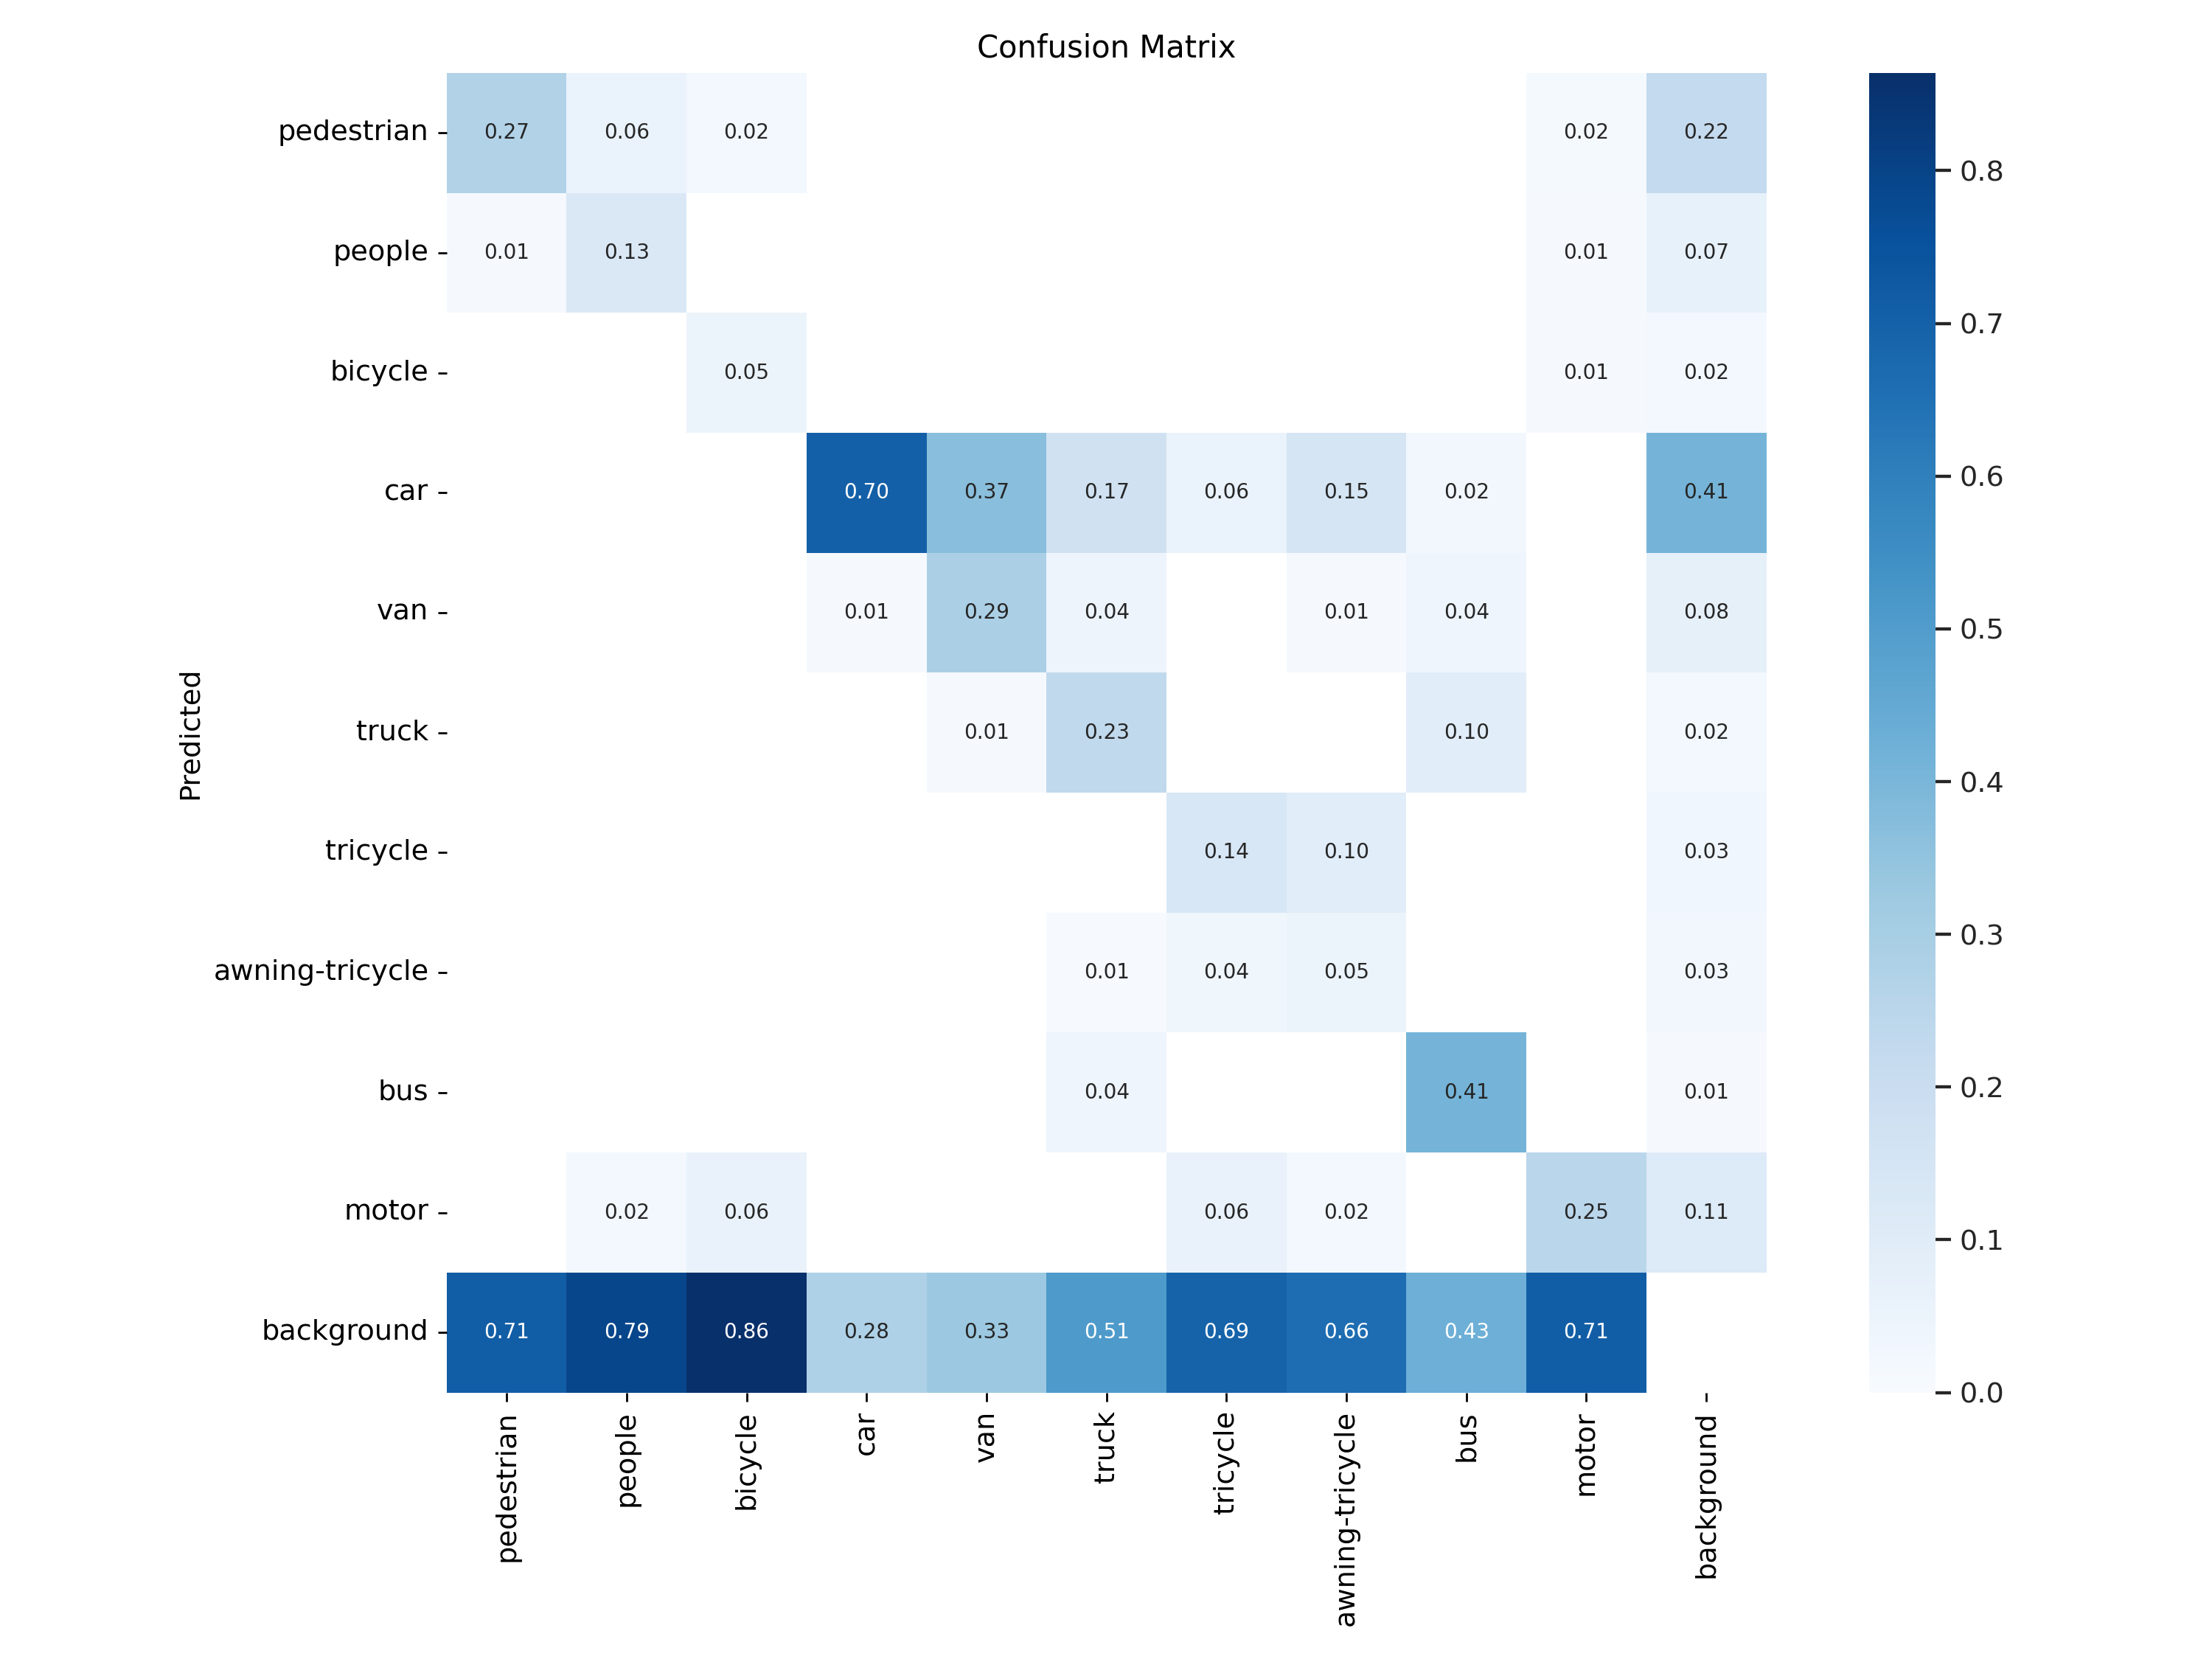

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results/visdrone_experiment4/confusion_matrix.png", width=1000)

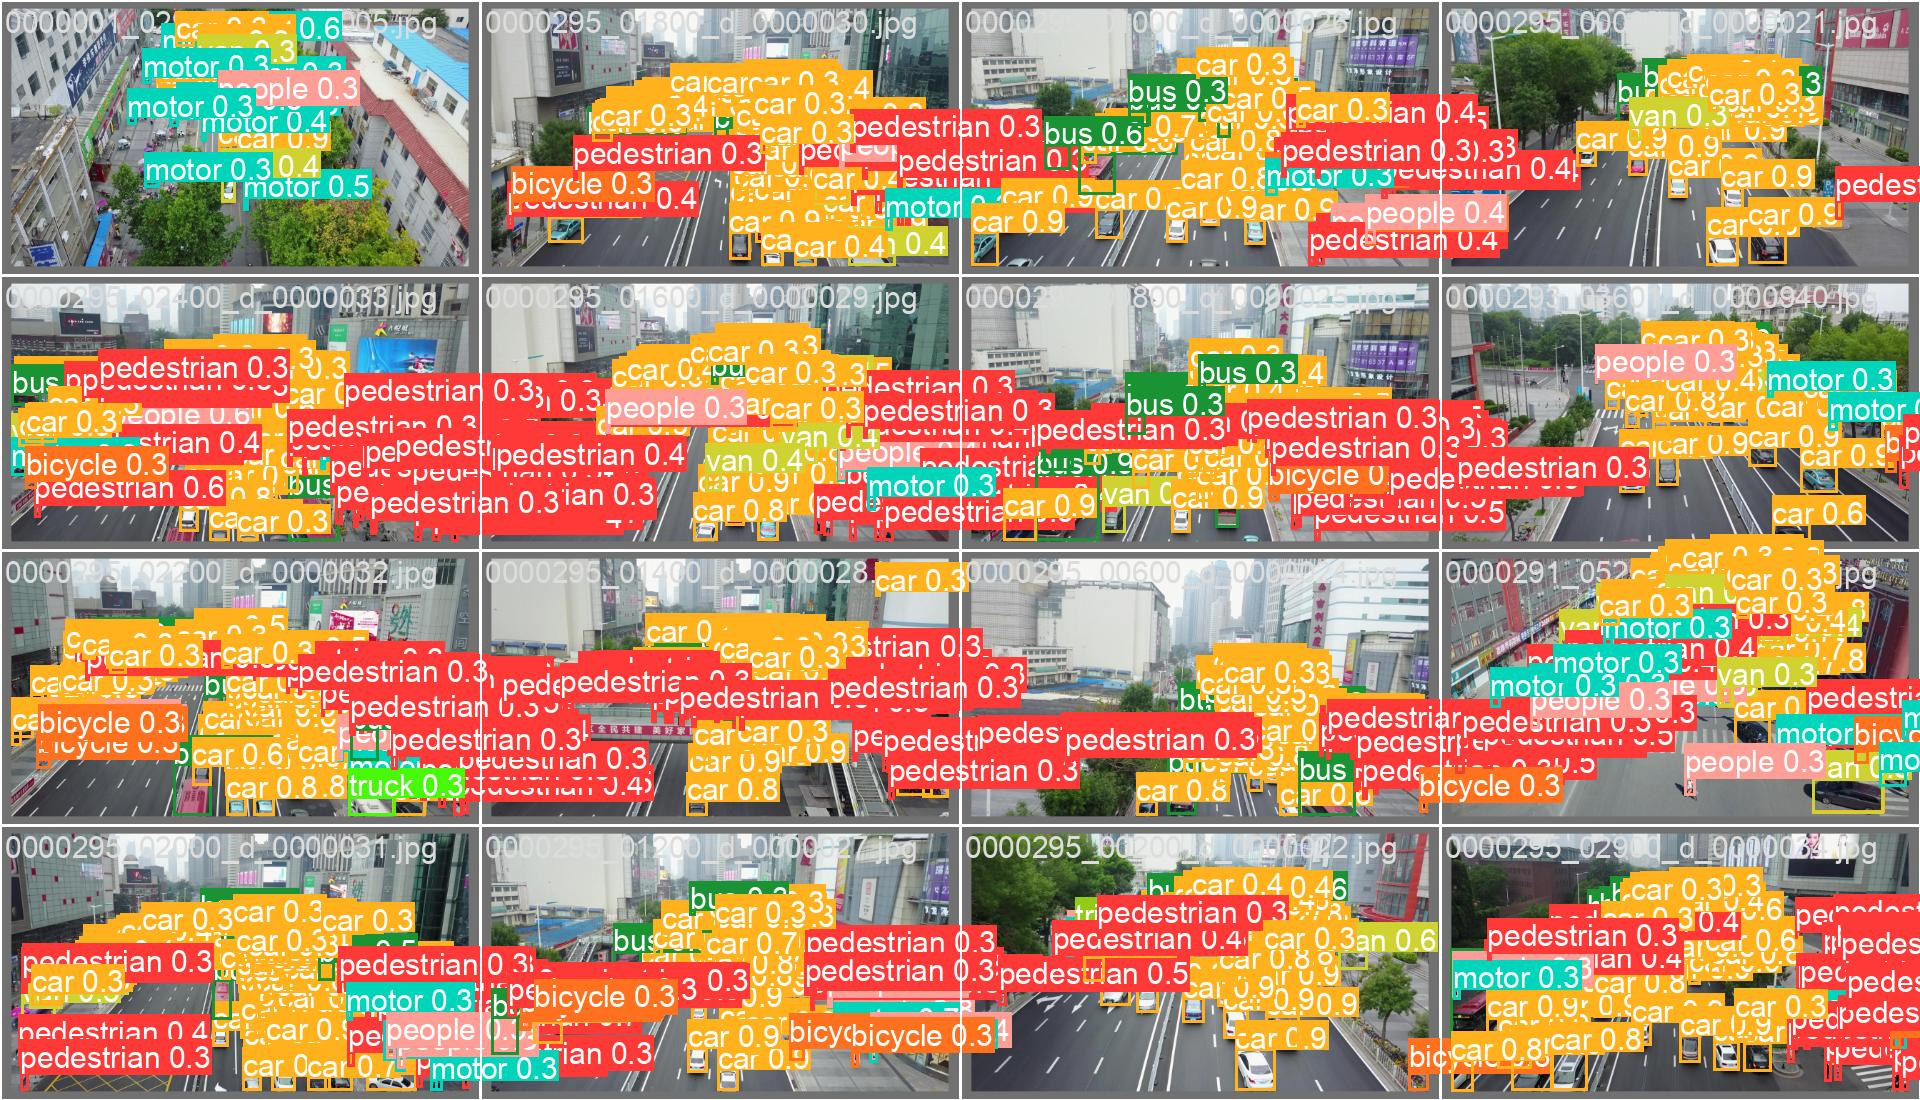

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results/visdrone_experiment4/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
!python val.py \
--img 640 --batch 15 --conf 0.001 --iou 0.7 --device cpu \
--data /content/yolov9/data/VisDrone.yaml \
--weights /content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt \
--project /content/drive/MyDrive/yolov9_results \
--name val_visdrone_test_dev

val: data=/content/yolov9/data/VisDrone.yaml, weights=['/content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt'], batch_size=15, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/drive/MyDrive/yolov9_results, name=val_visdrone_test_dev, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25418670 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 37/37 [18:32<00:00, 30.08s/it]
                   all        548      38759      0.447      0.344      0.339      0.198
          

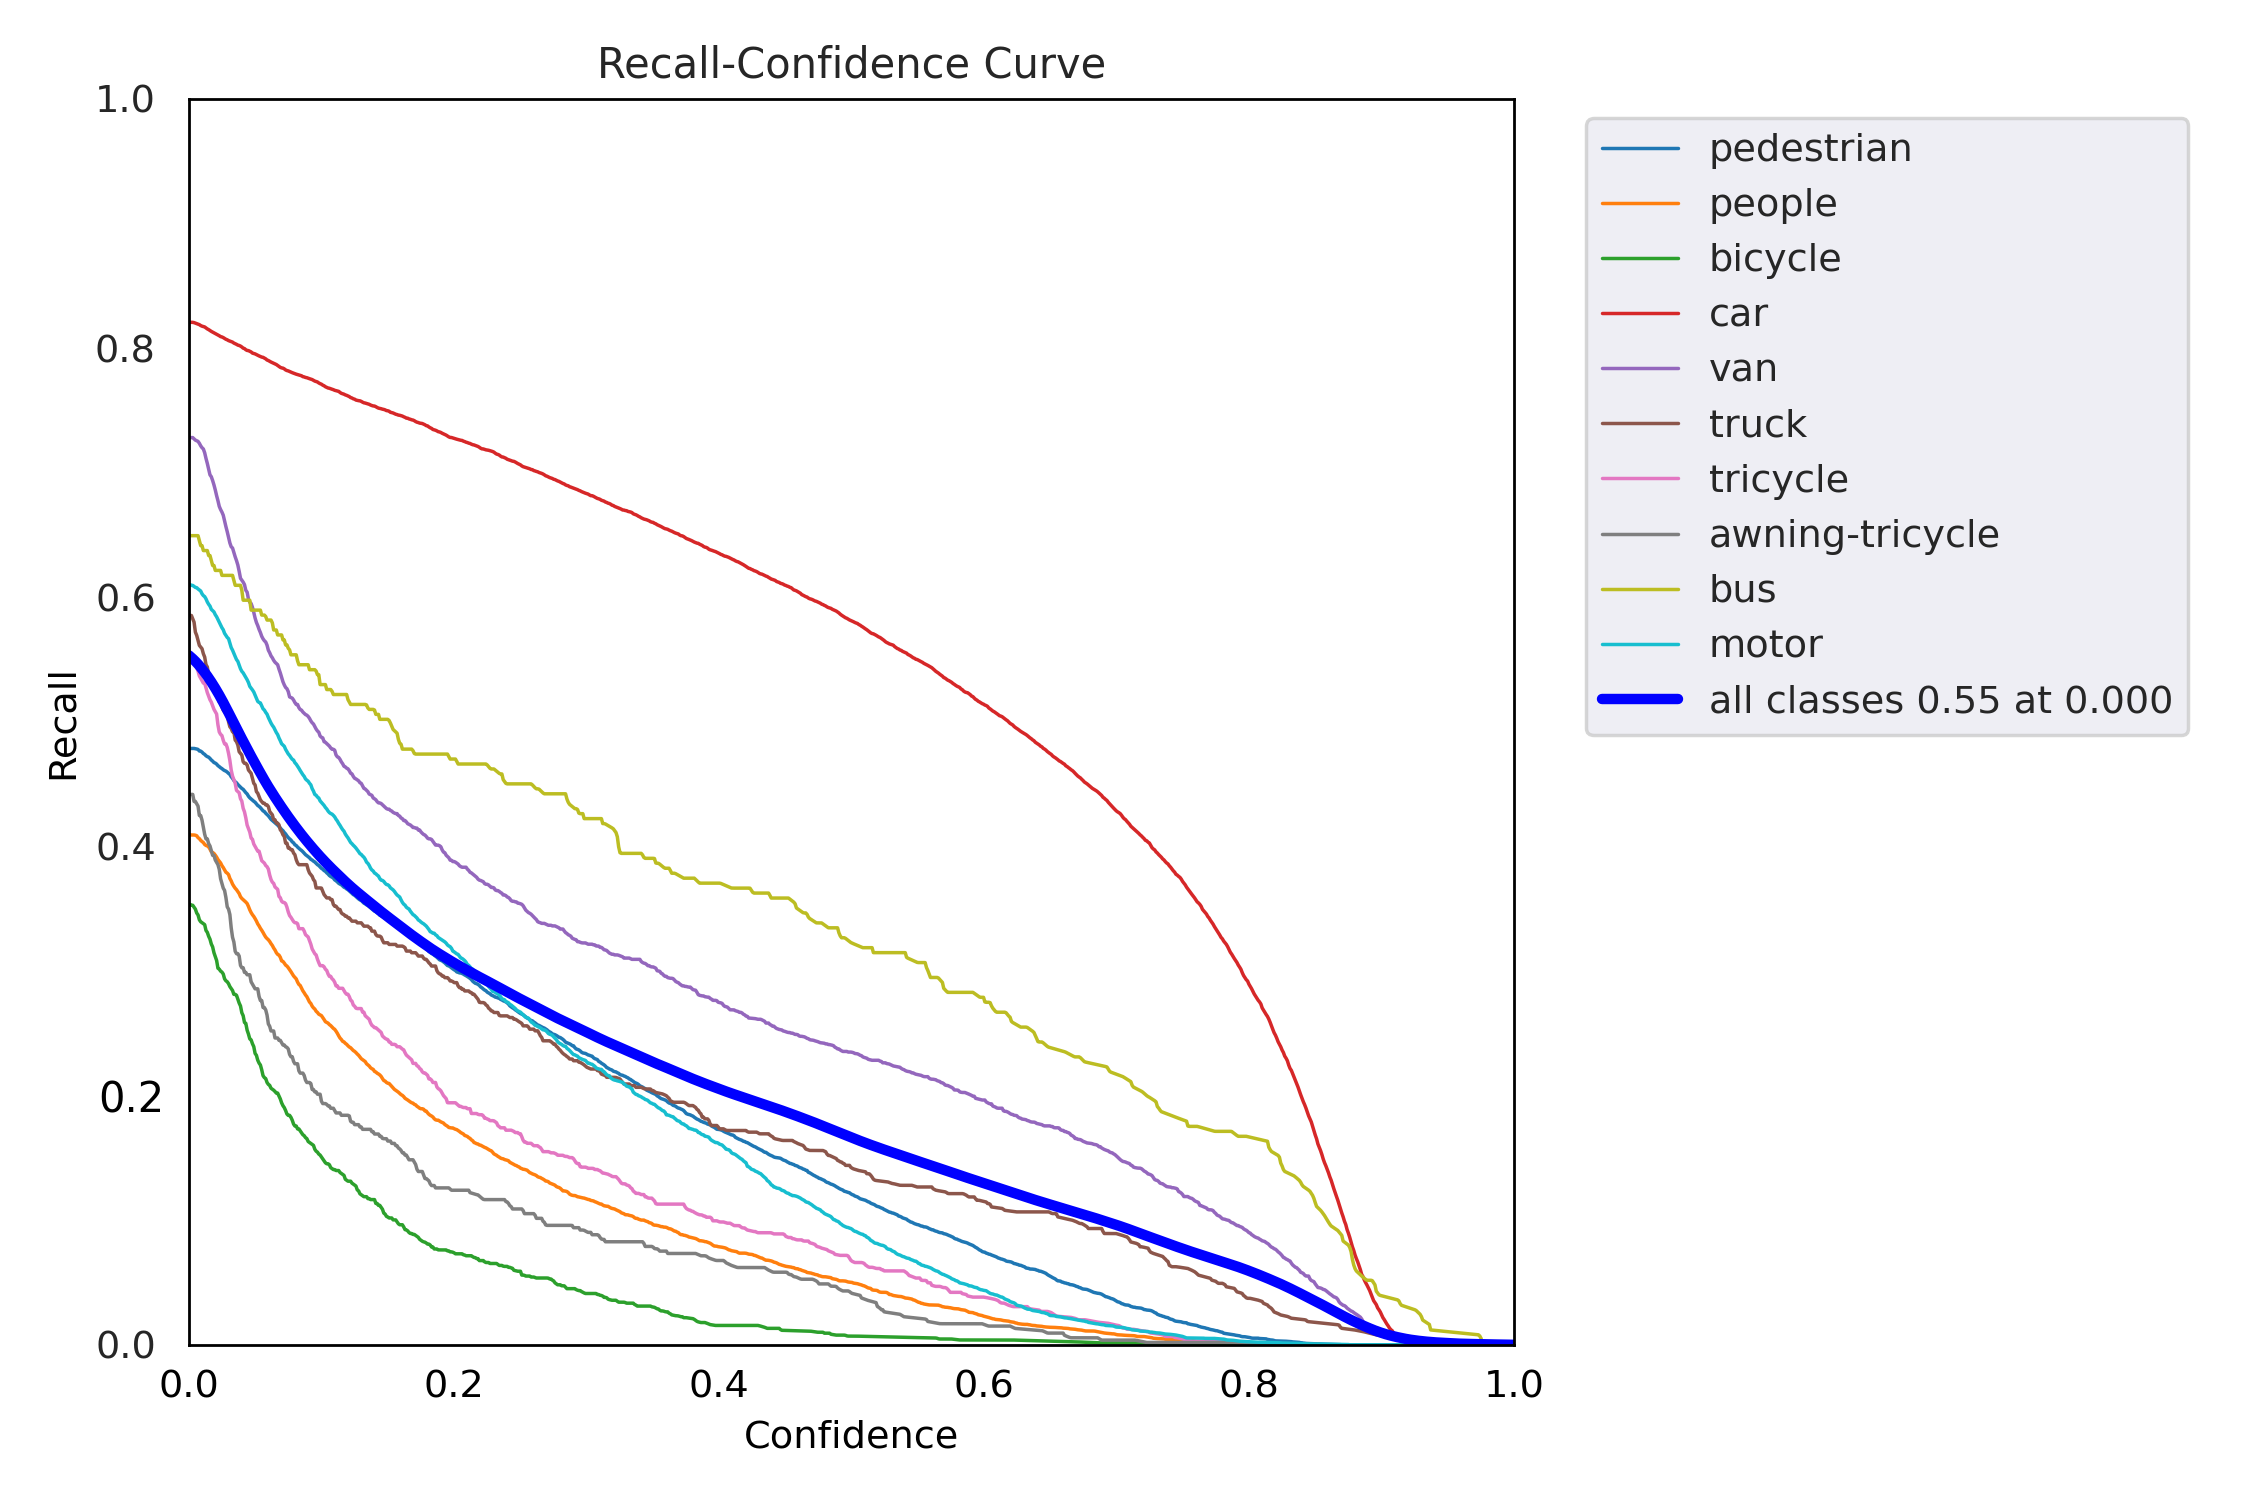

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results/val_visdrone_test_dev/R_curve.png", width=1000)

## Detect:

### Detect VisDrone2019-DET-test-dev(images)

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt --conf 0.25 --source /content/datasets/VisDrone/VisDrone2019-DET-test-dev/images --device cpu --project /content/drive/MyDrive/yolov9_results --name detect_visdrone_test_dev


detect: weights=['/content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt'], source=/content/datasets/VisDrone/VisDrone2019-DET-test-dev/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/yolov9_results, name=detect_visdrone_test_dev, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25418670 parameters, 0 gradients, 102.5 GFLOPs
image 1/1610 /content/datasets/VisDrone/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg: 384x640 2 pedestrians, 29 cars, 3 vans, 7 trucks, 2279.9ms
image 2/1610 /content/datasets/VisDrone/VisDrone2019-DET-test-dev/images/0000006_00

### Detect VisDrone2019-VID-test-dev(videos)

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt --conf 0.25 --source /content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v  --project /content/drive/MyDrive/yolov9_results --name detect_visdrone_video

detect: weights=['/content/drive/MyDrive/yolov9_results/visdrone_experiment4/weights/best.pt'], source=/content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/yolov9_results, name=detect_visdrone_video, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25418670 parameters, 0 gradients, 102.5 GFLOPs
image 1/219 /content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v/0000001.jpg: 384x640 15 cars, 3 vans, 115.3ms
image 2/219 /content/datasets/VisDrone/VisDrone2019-VID-test-dev

### The labled video output

In [ ]:
!pip install opencv-python

import cv2
import os


image_folder = '/content/drive/MyDrive/yolov9_results/detect_visdrone_video4'
output_path = '/content/drive/MyDrive/yolov9_results/detect_visdrone_video4/video/output_video.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
size = (width, height)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 1, size)

for image in images:
    frame = cv2.imread(os.path.join(image_folder, image))
    out.write(frame)


out.release()
print(f"Video saved at: {output_path}")


Video saved at: /content/drive/MyDrive/yolov9_results/detect_visdrone_video4/video/output_video.mp4


# **With weight:**

## Download model weights:

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 Jun 19 16:28 .
drwxr-xr-x 1 root root      4096 Jun 19 16:27 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Train(gelan-c):

In [ ]:
!python train.py --batch 8 --epochs 25 --img 640 --device 0 --data /content/yolov9/data/VisDrone.yaml --weights /content/weights/gelan-c.pt --cfg models/detect/gelan-c.yaml --hyp data/hyps/hyp.scratch-high.yaml --project /content/drive/MyDrive/yolov9_results_with_weight --name visdrone_experiment_gelan-c

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


## resume the train(yolov9-c):

In [ ]:
!python train.py --resume /content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/weights/last.pt

2024-07-07 17:40:03.482854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 17:40:03.482913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 17:40:03.591930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 17:40:03.825296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-07 17:40:06.365394: W tensorflow/comp

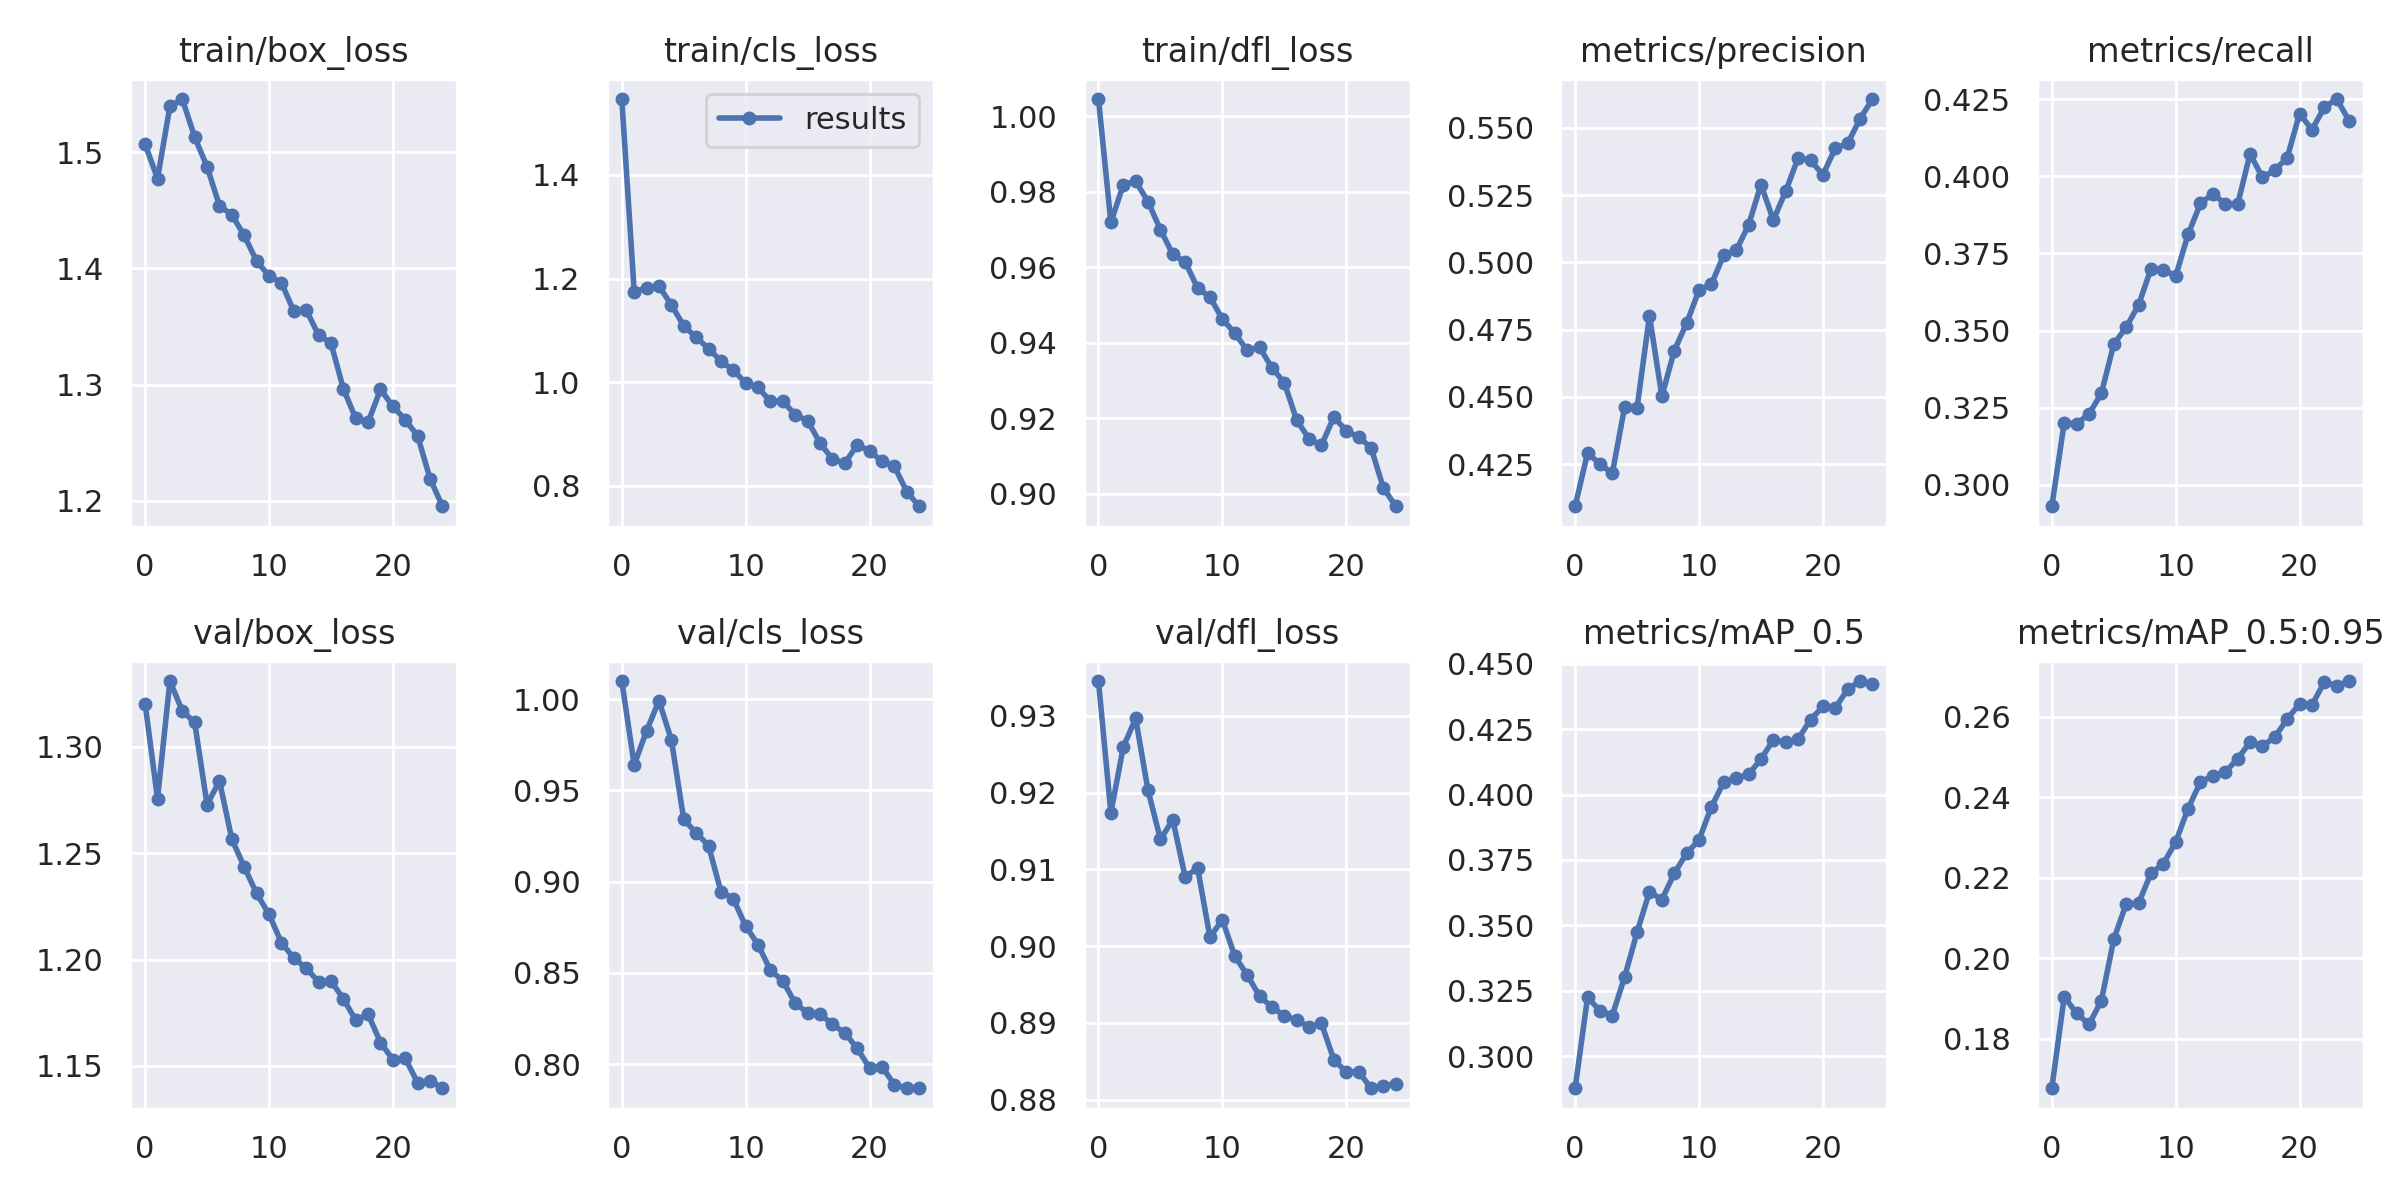

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/results.png", width=1000)

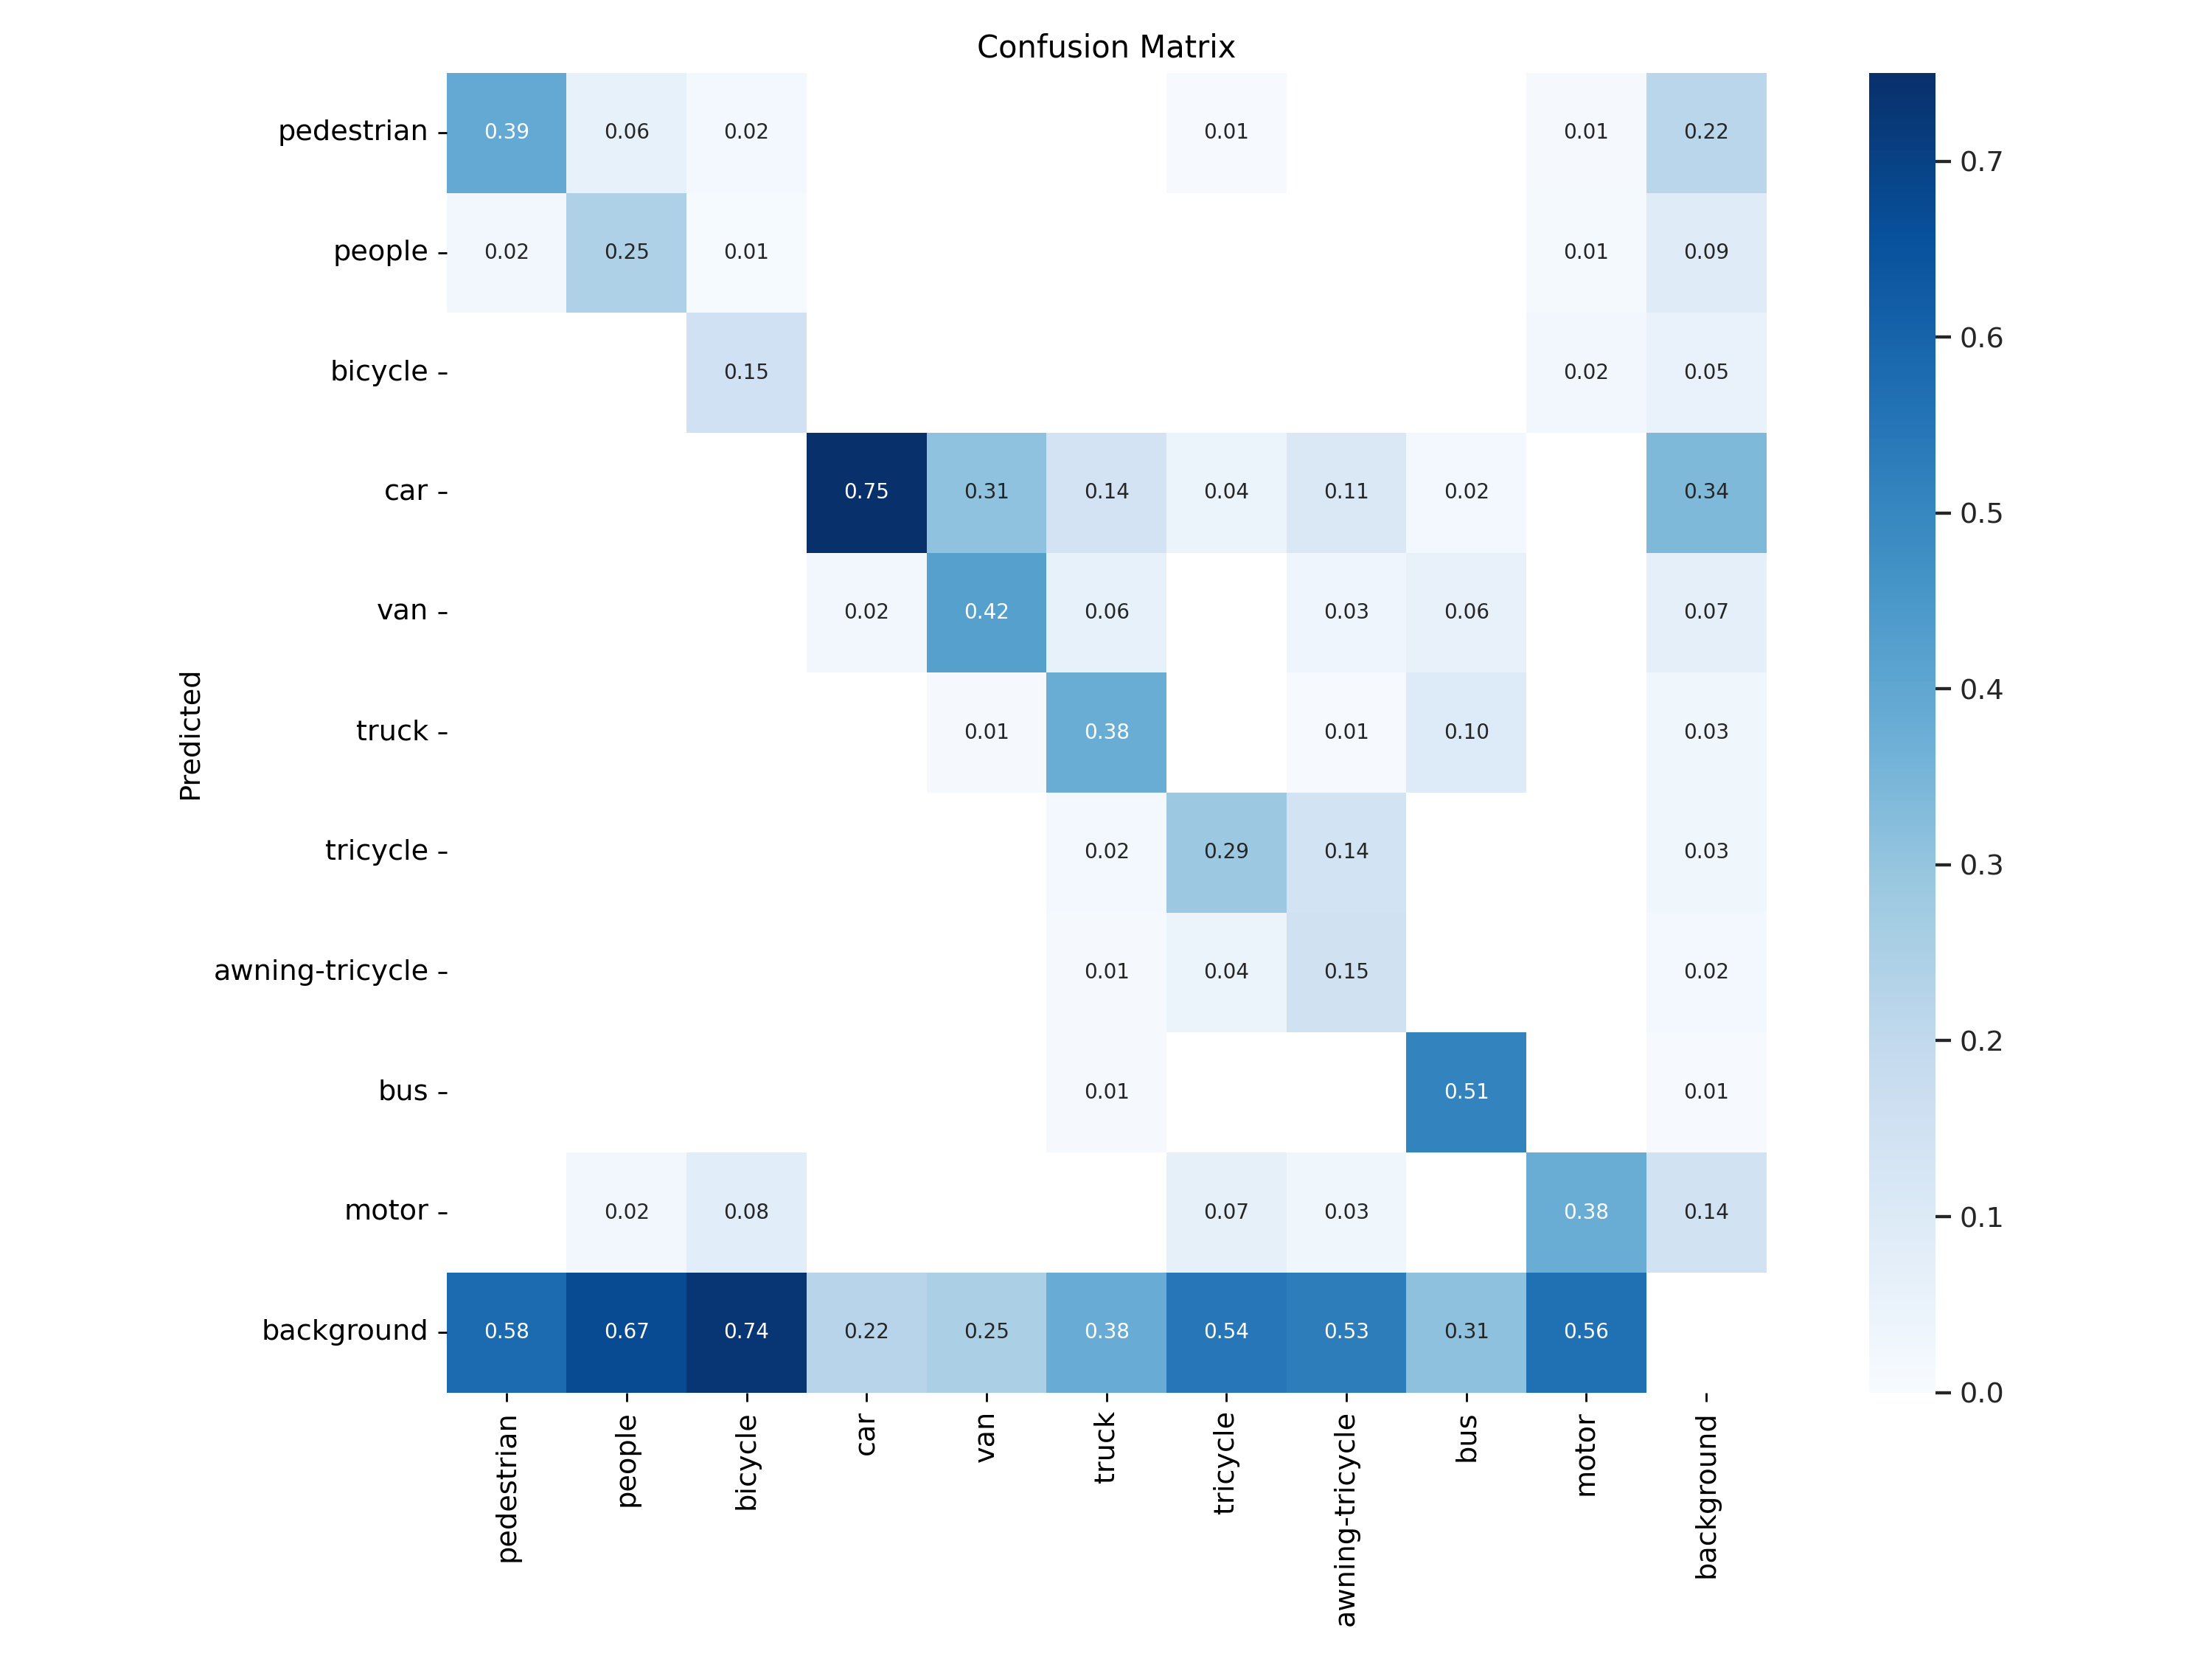

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/confusion_matrix.png", width=1000)

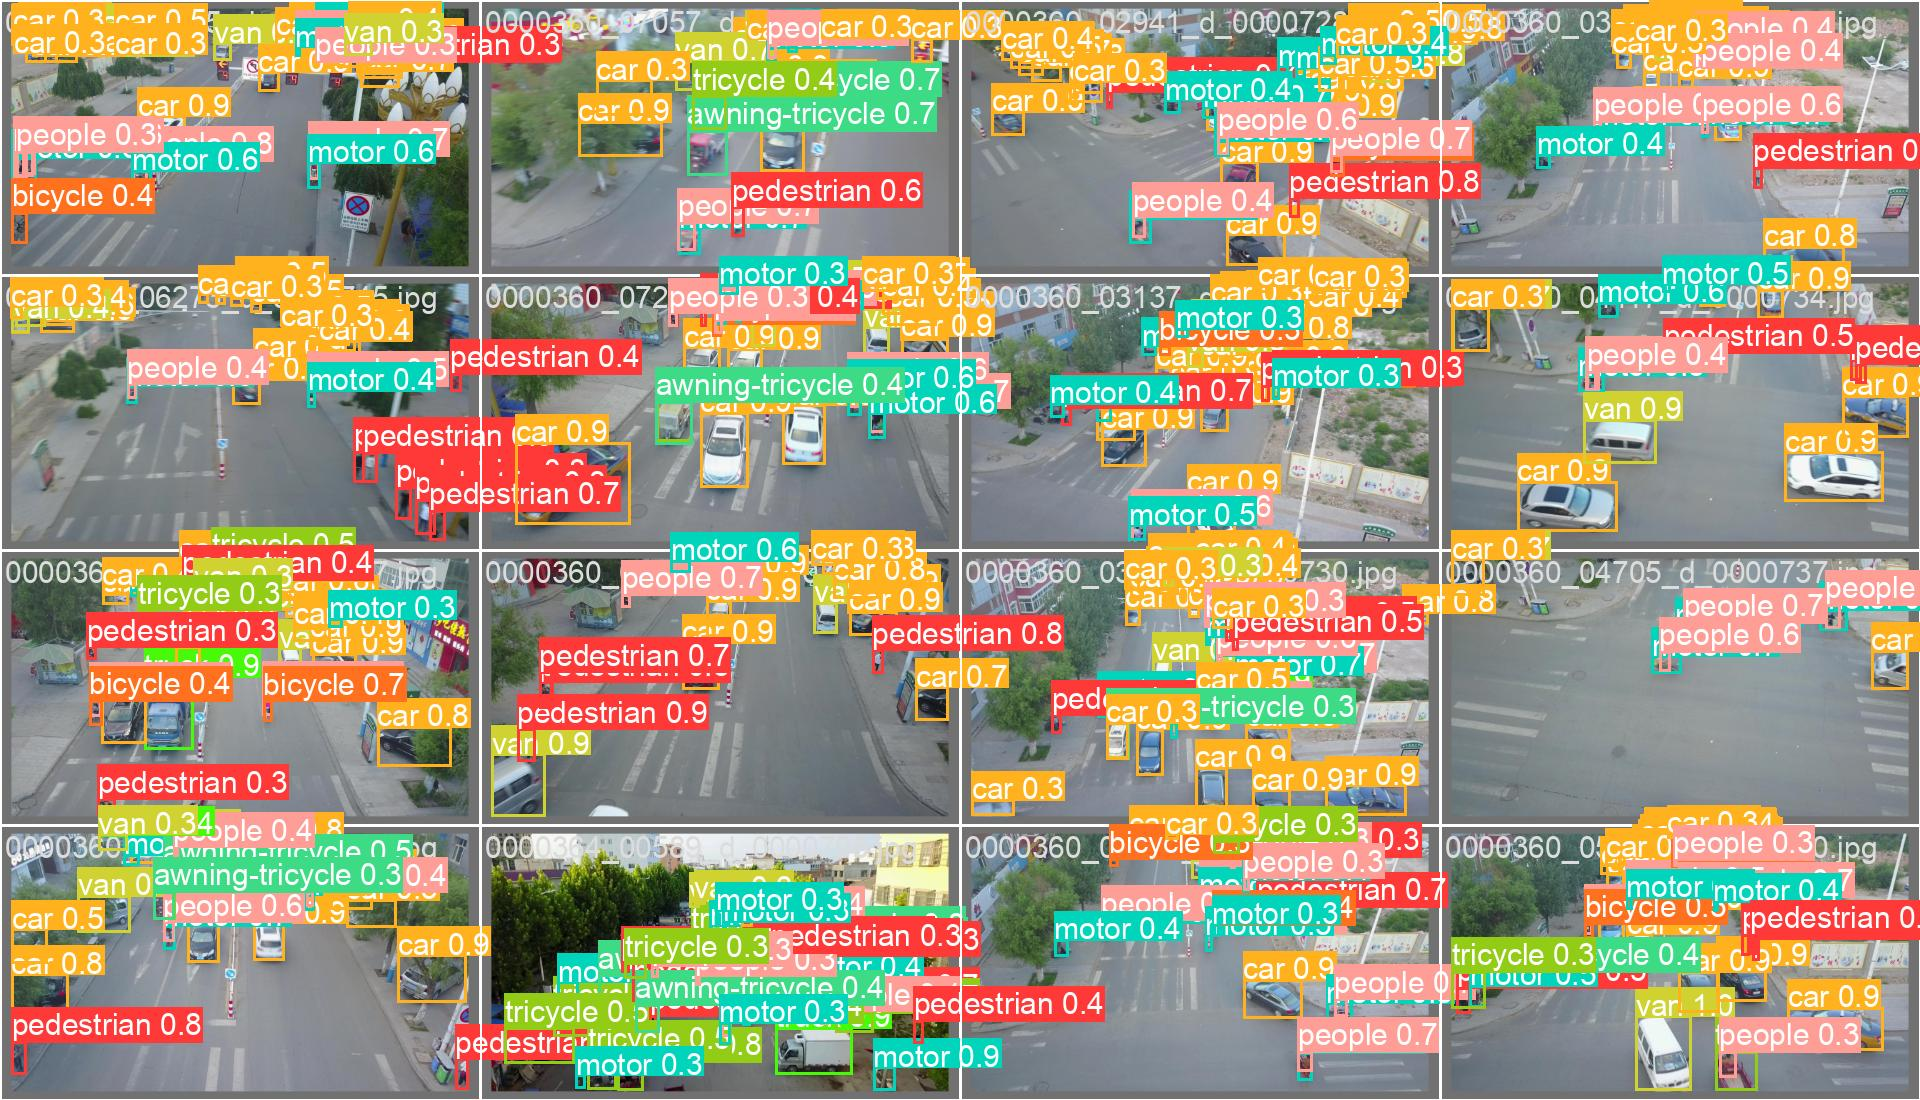

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/val_batch0_pred.jpg", width=1000)

## Detect:

### Detect VisDrone2019-VID-test-dev(videos)

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/weights/best.pt --conf 0.25 --source /content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v --project /content/drive/MyDrive/yolov9_results_with_weight --name detect_visdrone_video

detect: weights=['/content/drive/MyDrive/yolov9_results_with_weight/visdrone_experiment_gelan-c/weights/best.pt'], source=/content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/yolov9_results_with_weight, name=detect_visdrone_video, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25418670 parameters, 0 gradients, 102.5 GFLOPs
image 1/219 /content/datasets/VisDrone/VisDrone2019-VID-test-dev/sequences/uav0000009_03358_v/0000001.jpg: 384x640 15 cars, 3 vans, 204.1ms
image 2/219 /content/datasets/Vis

### The labled video output

In [ ]:
!pip install opencv-python
import cv2
import os


image_folder = '/content/drive/MyDrive/yolov9_results_with_weight/detect_visdrone_video'
output_path = '/content/drive/MyDrive/yolov9_results_with_weight/detect_visdrone_video/video/output_video_w_weights.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
size = (width, height)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 14
out = cv2.VideoWriter(output_path, fourcc, fps, size)

for image in images:
    frame = cv2.imread(os.path.join(image_folder, image))
    out.write(frame)


out.release()
print(f"Video saved at: {output_path}")


Video saved at: /content/drive/MyDrive/yolov9_results_with_weight/detect_visdrone_video/video/output_video_w_weights.mp4
